# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "0a3f547761154cd89b5616aa3f34603e9902d002"
connection.set_access_token(API_TOKEN)

Access token is valid.


#### NOTE: Before creating or executing the strategy, ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here.](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/)![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png)

# Strategy Creation

## Import Strategy from pyalgostrategypool


In [5]:
! wget -O vwap_crossover_us.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/vwap_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' vwap_crossover_us.py

--2023-12-01 11:56:29--  https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/vwap_crossover.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2425 (2.4K) [text/plain]
Saving to: ‘vwap_crossover_us.py’

vwap_crossover_us.p 100%[===================>]   2.37K  --.-KB/s    in 0s      

2023-12-01 11:56:30 (36.0 MB/s) - ‘vwap_crossover_us.py’ saved [2425/2425]



In [6]:
from vwap_crossover_us import VWAPCrossover as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 136425,
 'strategyId': '0ca2ee5dd53b45ce98c64563fa7755d9'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('TSLA', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:TSLA'

## Setup Parameters

In [10]:
parameters = {
  'TIMEPERIOD': 12,
}

In [11]:
initial_virtual_funds = 4000     # in dollars

## Backtesting

#### NOTE: Ensure your Alpaca account is binded with your AlgoBulls account (as shown below). To know more click [here.](https://algobulls.github.io/pyalgotrading/brokers/connecting_alpaca/)![Reference](https://algobulls.github.io/pyalgotrading/python_build/imgs_v2/python_build_Oauth_successful.png) 

### Start

In [12]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 -0400', 
    end='2023-07-31 15:30 -0400', 
    instrument='NASDAQ:TSLA', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds
)


Starting the strategy 'VWAP Crossover' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ VWAP Crossover            │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NASDAQ:TSLA']           │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 5                         │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00-04:00 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIMEPERIOD': 12}        │
├─────────────────────────┼──────────────

### Status

In [13]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [14]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (5)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [15]:
print(logs)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Stop

In [16]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


## Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

,instrument_segment,instrument_tradingsymbol,entry_timestamp,entry_transaction_type,entry_quantity,entry_currency,entry_price,entry_variety,exit_timestamp,exit_transaction_type,exit_quantity,exit_currency,exit_price,exit_variety,pnl_absolute,pnl_cumulative_absolute,brokerage,net_pnl
0,NASDAQ,TSLA,2021-08-02 12:30:00-04:00,SELL,5,$,716.00,,2021-08-02 13:30:00-04:00,BUY,5,$,716.00,,0.00,0.00,0,0.00
1,NASDAQ,TSLA,2021-08-02 13:30:00-04:00,SELL,5,$,716.00,,2021-08-02 14:30:00-04:00,BUY,5,$,716.00,,0.00,0.00,0,0.00
2,NASDAQ,TSLA,2021-08-02 14:30:00-04:00,SELL,5,$,716.00,,2021-08-02 15:30:00-04:00,BUY,5,$,716.00,,0.00,0.00,0,0.00
3,NASDAQ,TSLA,2021-08-03 09:30:00-04:00,BUY,5,$,718.59,,2021-08-03 10:30:00-04:00,SELL,5,$,708.07,,-52.60,-52.60,0,-52.60
4,NASDAQ,TSLA,2021-08-03 10:30:00-04:00,SELL,5,$,708.07,,2021-08-03 12:30:00-04:00,BUY,5,$,710.00,,-9.65,-62.25,0,-9.65
5,NASDAQ,TSLA,2021-08-03 12:30:00-04:00,BUY,5,$,710.00,,2021-08-03 13:30:00-04:00,SELL,5,$,710.00,,0.00,-62.25,0,0.00
6,NASDAQ,TSLA,2021-08-03 13:30:00-04:00,BUY,5,$,710.00,,2021-08-03 14:30:00-04:00,SELL,5,$,710.00,,0.00,-62.25,0,0.00
7,NASDAQ,TSLA,2021-08-03 14:30:00-04:00,BUY,5,$,710.00,,2021-08-03 15:30:00-04:00,SELL,5,$,710.00,,0.00,-62.25,0,0.00
8,NASDAQ,TSLA,2021-08-04 09:30:00-04:00,BUY,5,$,711.24,,2021-08-04 12:30:00-04:00,SELL,5,$,716.39,,25.75,-36.50,0,25.75
9,NASDAQ,TSLA,2021-08-04 12:30:00-04:00,SELL,5,$,716.39,,2021-08-04 13:30:00-04:00,BUY,5,$,716.39,,0.00,-36.50,0,0.00


## Statistics Reports

### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      70.0%

Cumulative Return   3.01%
CAGR﹪              1.5%

Sharpe              0.16
Prob. Sharpe Ratio  59.71%
Sortino             0.24
Sortino/√2          0.17
Omega               1.04

Max Drawdown        -17.52%
Longest DD Days     497

Gain/Pain Ratio     0.05
Gain/Pain (1M)      0.28

Payoff Ratio        1.05
Profit Factor       1.04
Common Sense Ratio  0.92
CPC Index           0.54
Tail Ratio          0.89
Outlier Win Ratio   9.31
Outlier Loss Ratio  4.3

MTD                 -1.54%
3M                  -6.3%
6M                  -3.99%
YTD                 -3.9%
1Y                  -5.2%
3Y (ann.)           1.5%
5Y (ann.)           1.5%
10Y (ann.)          1.5%
All-time (ann.)     1.5%

Avg. Drawdown       -2.93%
Avg. Drawdown Days  53
Recovery Factor     0.17
Ulcer Index         0.08
Serenity Index      0.02


### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             70.0%

Cumulative Return          3.01%
CAGR﹪                     1.5%

Sharpe                     0.16
Prob. Sharpe Ratio         59.71%
Smart Sharpe               0.14
Sortino                    0.24
Smart Sortino              0.22
Sortino/√2                 0.17
Smart Sortino/√2           0.15
Omega                      1.04

Max Drawdown               -17.52%
Longest DD Days            497
Volatility (ann.)          13.67%
Calmar                     0.09
Skew                       1.02
Kurtosis                   11.27

Expected Daily %           0.0%
Expected Monthly %         0.14%
Expected Yearly %          0.99%
Kelly Criterion            1.89%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.41%
Expected Shortfall (cVaR)  -1.41%

Max Consecutive Wins       6
M

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-03-21,2022-05-18,2023-07-31,497,-17.515594,-14.694247
2,2022-02-18,2022-02-22,2022-03-04,14,-4.696573,-4.332126
3,2021-09-29,2021-10-01,2022-02-14,138,-3.980117,-3.822057
4,2022-03-09,2022-03-10,2022-03-11,2,-3.788441,-2.795737
5,2021-08-23,2021-08-23,2021-09-03,11,-2.080794,-1.746794


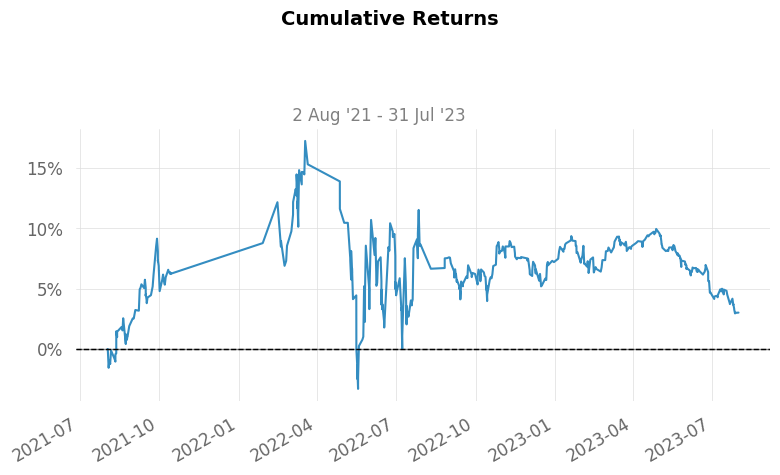

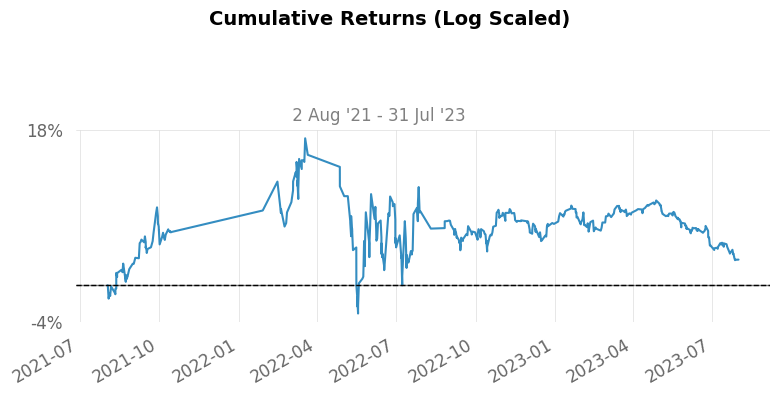

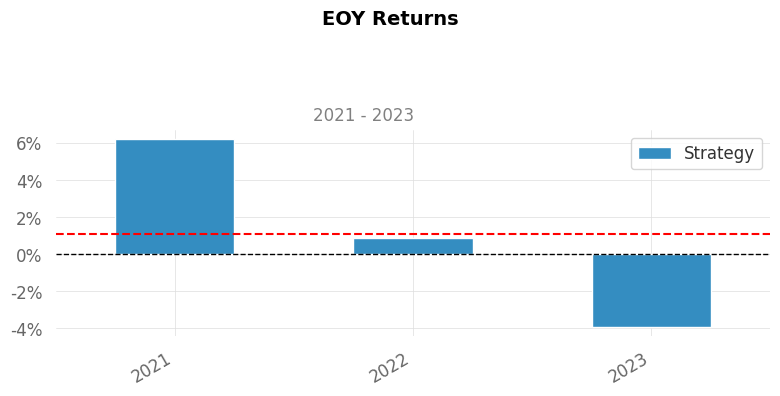

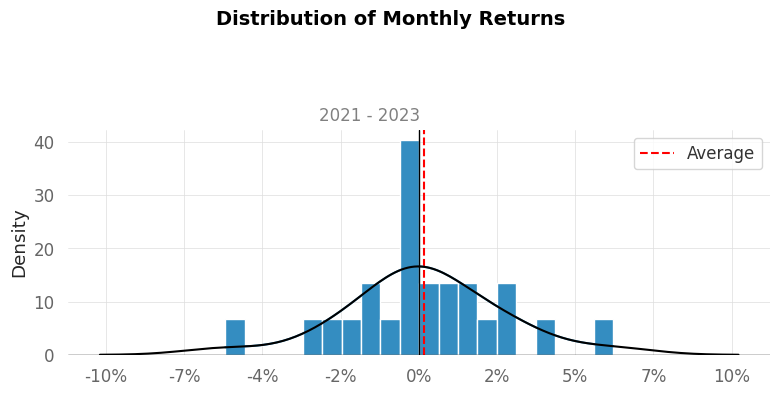

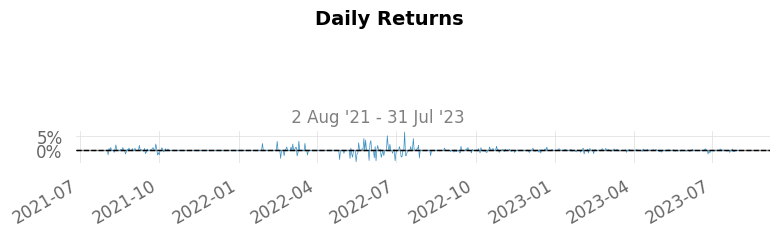

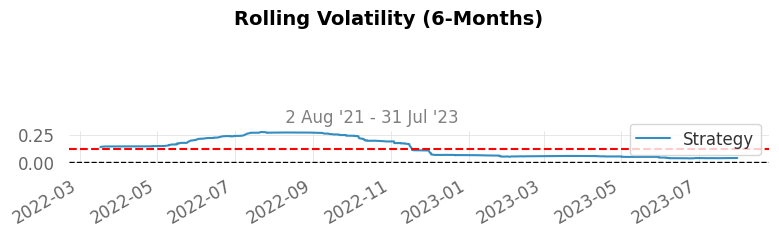

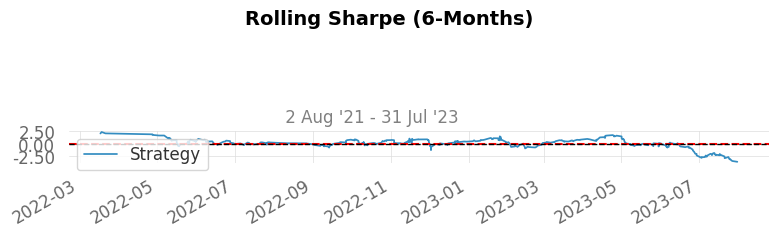

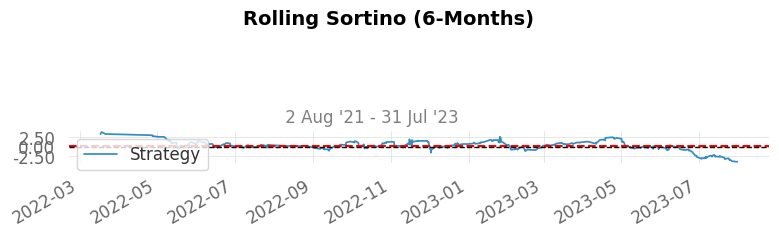

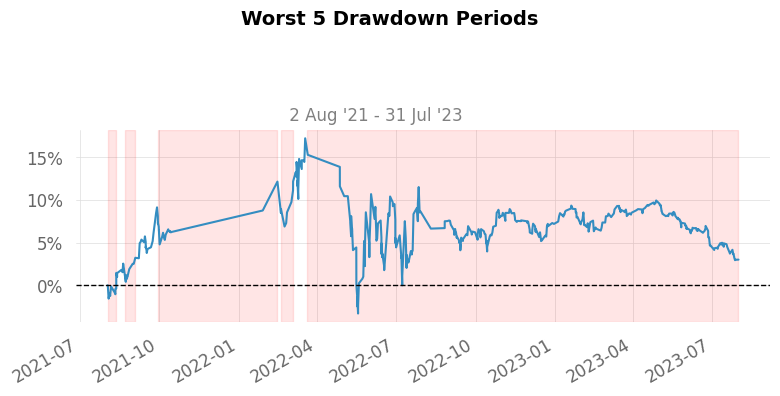

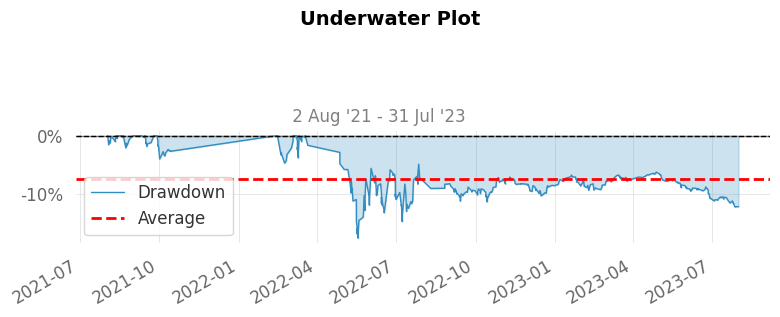

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


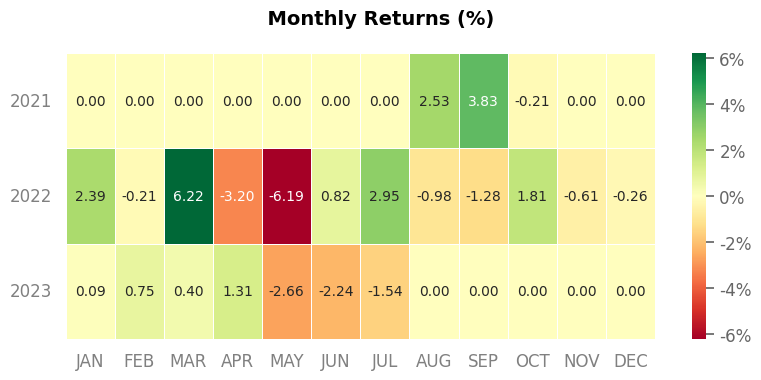

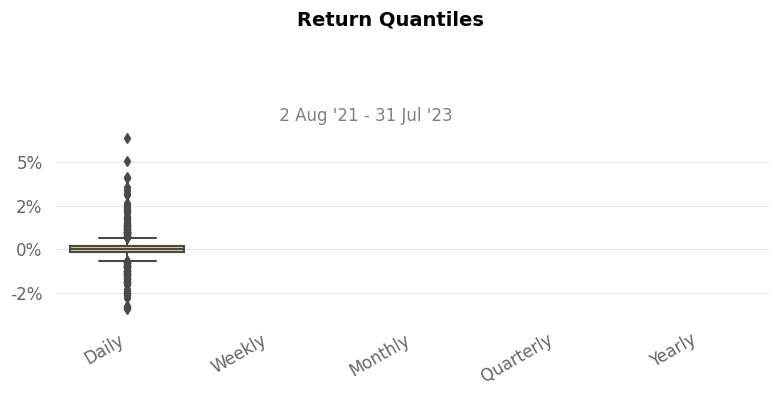

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

## Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | b850e372604948a38db8a82d440b5e4c |
| Transaction Type | BUY                              |
| Instrument       | NASDAQ:TSLA                      |
| Quantity         | 5                                |
| Price            | $266.09                          |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-12-01T06:39:52.544487Z | COMPLETE               |
| 2023-12-01T06:39:52.544470Z | OPEN                   |
| 2023-12-01T06:39:52.544452Z | OPEN PENDING           |
| 2023-12-01T06:39:52.544431Z | VALIDATION PENDING     |
| 2023-12-01T06:39:52.544386Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | 42b5bea3425a45069

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 -0400', 
    end='15:00 -0400',  
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute'
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Live Trading (Real Trading)

### Start

In [ ]:
broking_details = {
    'brokerName': 'ALPACA LIVE',
    'credentialParameters': {}
}

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:TSLA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Live Trading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Live Trading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)